In [1]:
from fenics import *
from dolfin_adjoint import *
import pygmsh_mesh_functions
from pygmsh_mesh_functions import *
import meshio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hole_ellipse(domain, c, l1, l2, theta, margin = 0.05):
    co, so = np.cos(theta), np.sin(theta)
    Rotation = np.array(((co, -so), (so, co)))
    ell_c = add_ellipse(c, l1*(1-margin), l2*(1-margin), theta)
    domain = subtract(domain, ell_c)

In [3]:
def arrange_array(n_holes_x, n_holes_y, d_x, d_y,
                  freq = 1, phase = 0, shift = np.array([0,0])):
    
    min_n_holes = np.min((n_holes_x,n_holes_y))

#     xx = scale*(np.arange(n_holes_x)-n_holes_x/2+0.5)/size+0.5
#     yy = scale*(np.arange(n_holes_y)-n_holes_y/2+0.5)/size+0.5
    xx = (np.arange(n_holes_x)-n_holes_x/2+0.5)*d_x+0.5
    yy = (np.arange(n_holes_y)-n_holes_y/2+0.5)*d_y+0.5
    cx,cy = np.meshgrid(xx,yy)
    
    cx = cx.reshape(n_holes_x*n_holes_y)
    cy = cy.reshape(n_holes_x*n_holes_y)
    c = np.vstack((cx,cy)) # hole coordinate

    s_xx = (-1)**np.arange(n_holes_x)
    s_yy = (-1)**np.arange(n_holes_y)
    sgn_x,sgn_y = np.meshgrid(s_xx,s_yy)
    sgn = sgn_x*sgn_y
    sgn = sgn.reshape(n_holes_x*n_holes_y)
    theta = np.pi*(sgn/2)*freq + phase # hole orientation
    theta = theta + (np.random.rand(len(theta))-0.5)*0 + pi
    
    return(c, theta)

In [8]:
# arrange the tools
size = 4
c1, theta1 = arrange_array(5, 3, 1/size, 1/size, freq = 0.5, phase = np.pi/4)
# c2, theta2 = arrange_array(2, 3, np.sqrt(3)/size, 1/size, freq = 0.5, phase = np.pi/4)

In [9]:
theta1

array([4.71238898, 3.14159265, 4.71238898, 3.14159265, 4.71238898,
       3.14159265, 4.71238898, 3.14159265, 4.71238898, 3.14159265,
       4.71238898, 3.14159265, 4.71238898, 3.14159265, 4.71238898])

In [10]:
# s_xx = (-1)**np.arange(n_holes_x)
# s_yy = (-1)**np.arange(n_holes_y)
# sgn_x,sgn_y = np.meshgrid(s_xx,s_yy)
# sgn = sgn_x*sgn_y
# sgn = sgn.reshape(n_holes_x*n_holes_y)
# theta = np.pi*(1-sgn)/4

# xx_l = scale*(-1-n_holes_x/2+0.5)/min_n_holes+0.5
# xx_r = scale*(len(xx)-n_holes_x/2+0.5)/min_n_holes+0.5
# cx_l,cy_l = np.meshgrid(xx_l,yy)
# cx_r,cy_r = np.meshgrid(xx_r,yy)
# c_l = np.vstack((cx_l.T,cy_l.T))
# c_r = np.vstack((cx_r.T,cy_r.T))

# s_xx_l = (-1)**(-1)
# s_xx_r = (-1)**(len(xx))
# sgn_l = s_xx_l*s_yy
# sgn_r = s_xx_r*s_yy

Info    : Running '/home/fenics/.local/bin/gmsh -3 /tmp/tmpj5z3314j.geo -format msh -bin -o /tmp/tmp6i19m61j.msh' [Gmsh 4.9.5, 1 node, max. 1 thread]
Info    : Started on Thu May 12 02:27:54 2022
Info    : Reading '/tmp/tmpj5z3314j.geo'...
Info    : Done reading '/tmp/tmpj5z3314j.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Ellipse)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Ellipse)
Info    : [ 20%] Meshing curve 4 (Line)
Info    : [ 20%] Meshing curve 5 (Ellipse)
Info    : [ 20%] Meshing curve 6 (Line)
Info    : [ 30%] Meshing curve 7 (Line)
Info    : [ 30%] Meshing curve 8 (Line)
Info    : [ 40%] Meshing curve 9 (Ellipse)
Info    : [ 40%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 11 (Ellipse)
Info    : [ 50%] Meshing curve 12 (Ellipse)
Info    : [ 50%] Meshing curve 13 (Line)
Info    : [ 50%] Meshing curve 14 (Ellipse)
Info    : [ 60%] Meshing curve 15 (Line)
Info    : [ 60%] Meshing curve 16 (Line)
Info    : [ 70%] Meshi

3760

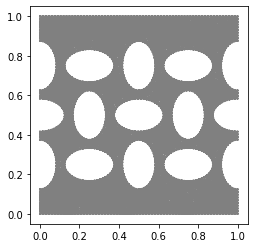

In [14]:
reset_geometry()

Lx = 1
Ly = 1

meshsize_min = 0.015
meshsize_max = 0.015

pygmsh_mesh_functions.hmeshmin = meshsize_min
pygmsh_mesh_functions.hmeshmax = meshsize_max

domain = add_polygon([(0, 0), (Lx, 0), (Lx, Ly), (0, Ly)])
X0 = np.array([0, 0])

#OPERATIONS ON DOMAIN
for i in range(len(theta1)):
    hole_ellipse(domain, c1[:,i], 1/8, 1/12, theta1[i], margin = 0)
# for i in range(len(theta2)):
#     hole_ellipse(domain, c2[:,i], 1/12, 1/8, theta2[i], margin = 0.2)


#CREATE AND STORE MESH
sample_name = "test_array_ellipse.xdmf"
out_dir = pathlib.Path("output_files")
out_dir.mkdir(parents=True, exist_ok=True)
mesh = create_fenics_mesh(mesh_path = out_dir / sample_name, verbose=True)
cell_type = mesh.cell_name()
with create_XDMFFile(out_dir / sample_name) as xf:
    xf.write(mesh)
    
plot(mesh)
len(mesh.coordinates())